<a href="https://colab.research.google.com/github/PatrickRuan/2nd-ML100Days/blob/master/Day_062_tsne%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-sne 觀察 : 分群

# [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化 (In[4], Out[4])

circles, perplexity=4 in 1.1 sec
circles, perplexity=6 in 1.1 sec
circles, perplexity=9 in 1.2 sec
circles, perplexity=14 in 1.3 sec
circles, perplexity=21 in 1.3 sec
circles, perplexity=30 in 1.1 sec
circles, perplexity=45 in 1.4 sec
circles, perplexity=66 in 1.9 sec
circles, perplexity=100 in 1.7 sec


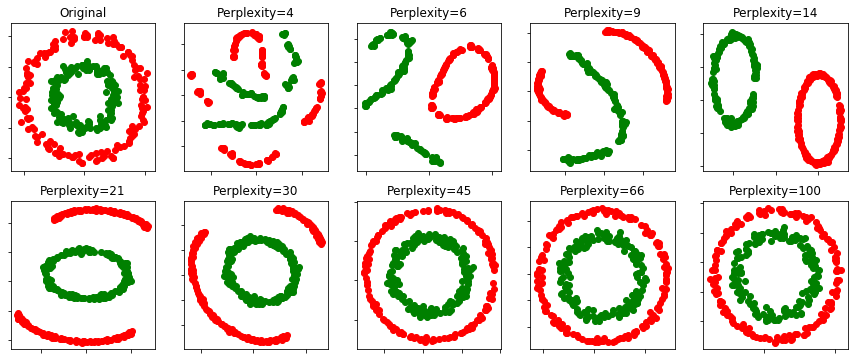

In [0]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定同心圓資料點 
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0 # 將 y 為 0 的 index set 存成變數 red
green = y == 1 # 將 y 為 1 的 index set 存成變數 green
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()


# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時不僅分群好, 也讓圖形更接近原圖
* 但 perplexity 越高, 執行時間也越久

circles, perplexity=5 in 1.1 sec
circles, perplexity=30 in 1.4 sec
circles, perplexity=50 in 1.3 sec
circles, perplexity=100 in 2.1 sec
S-curve, perplexity=5 in 1.2 sec
S-curve, perplexity=30 in 1.5 sec
S-curve, perplexity=50 in 1.7 sec
S-curve, perplexity=100 in 2.3 sec
uniform grid, perplexity=5 in 1.1 sec
uniform grid, perplexity=30 in 1.3 sec
uniform grid, perplexity=50 in 1.4 sec
uniform grid, perplexity=100 in 2 sec


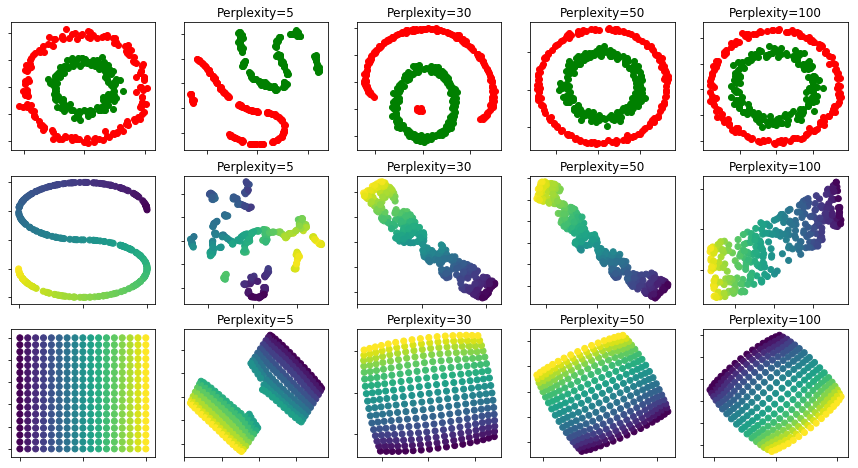

In [0]:

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))  # <==
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')





for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()


(300, 3)


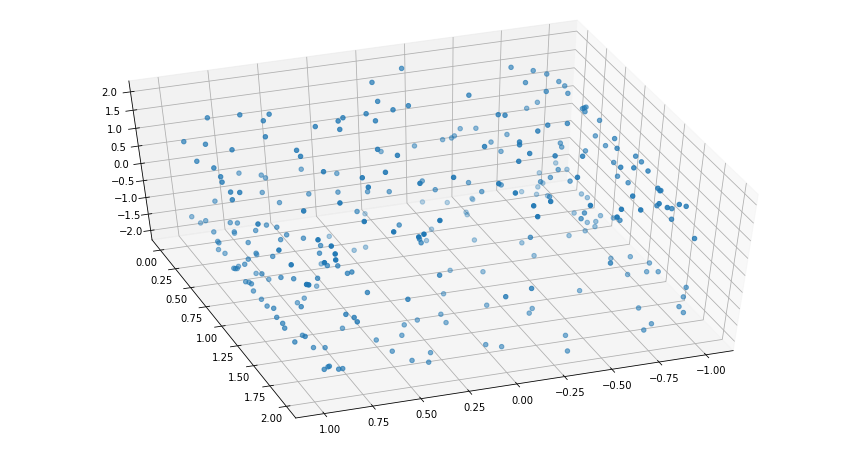

S-curve, perplexity=5 in 1.2 sec


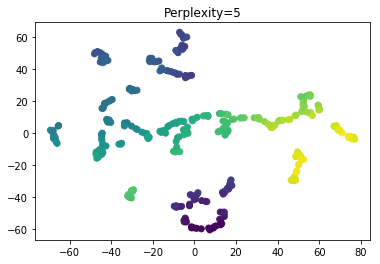

S-curve, perplexity=30 in 1.4 sec


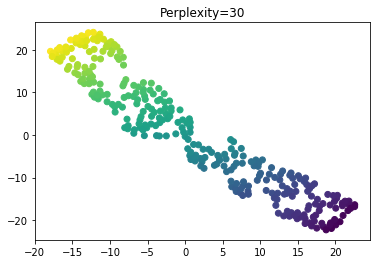

S-curve, perplexity=50 in 1.8 sec


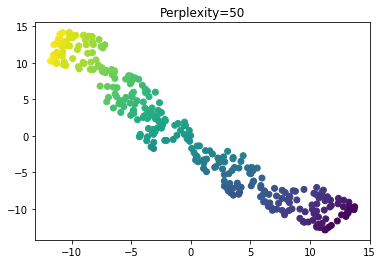

S-curve, perplexity=100 in 2.3 sec


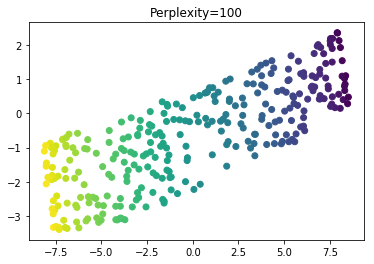

In [17]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
# 設定模型與繪圖參數


n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 8))  # <==
perplexities = [5, 30, 50, 100]


from mpl_toolkits import mplot3d




# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)
print(X.shape)


ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
ax.view_init(azim=70, elev=50)
plt.show()




for i, perplexity in enumerate(perplexities):
   

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    plt.title("Perplexity=%d" % perplexity)
    plt.scatter(Y[:, 0], Y[:, 1], c=color)
    plt.axis('tight')
    plt.show()

# First Try at t-SNE

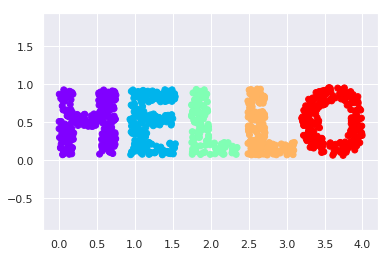

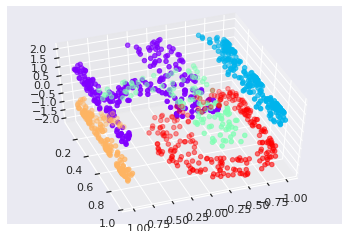

S-curve, perplexity=1 in 5.3 sec


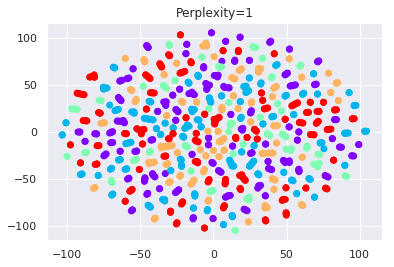

S-curve, perplexity=4 in 4.1 sec


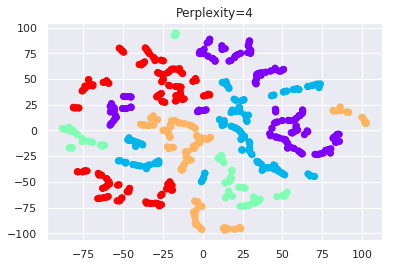

S-curve, perplexity=7 in 3.8 sec


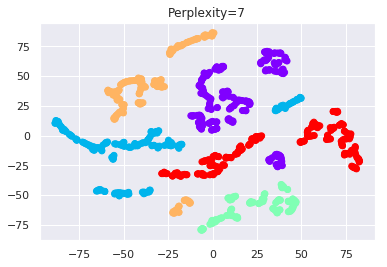

S-curve, perplexity=10 in 3.8 sec


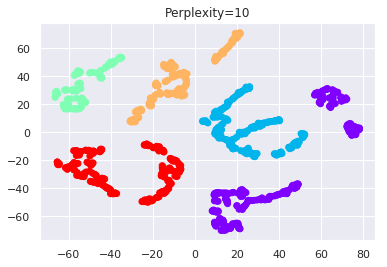

S-curve, perplexity=13 in 3.9 sec


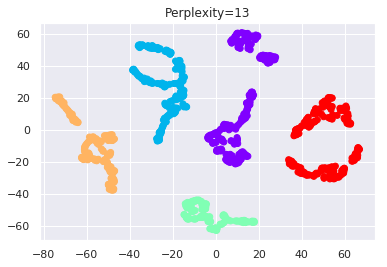

S-curve, perplexity=16 in 3.9 sec


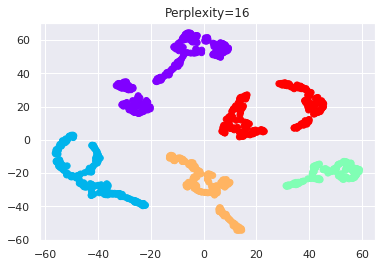

S-curve, perplexity=19 in 4.3 sec


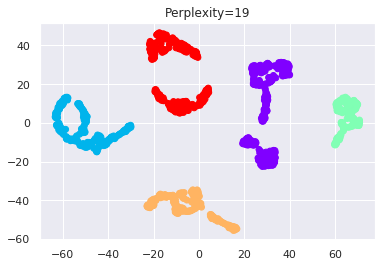

S-curve, perplexity=22 in 4.2 sec


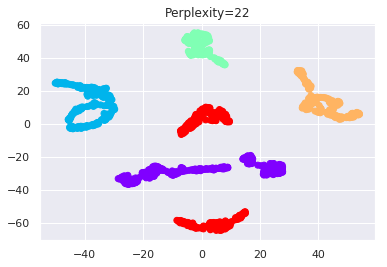

S-curve, perplexity=25 in 4.3 sec


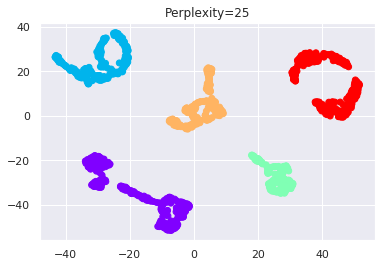

S-curve, perplexity=28 in 4.4 sec


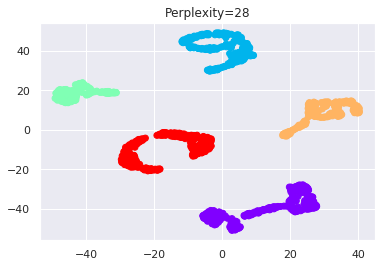

S-curve, perplexity=31 in 4.4 sec


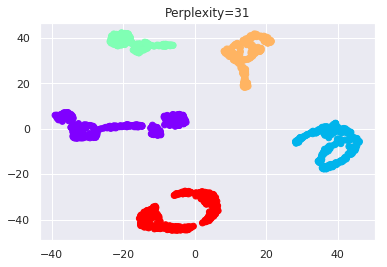

S-curve, perplexity=34 in 4.9 sec


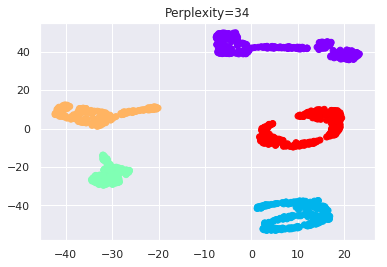

S-curve, perplexity=37 in 4.8 sec


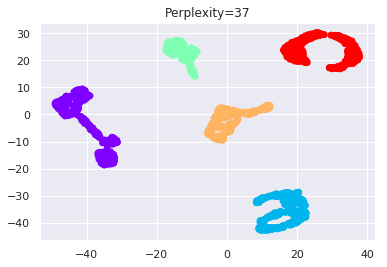

S-curve, perplexity=40 in 4.8 sec


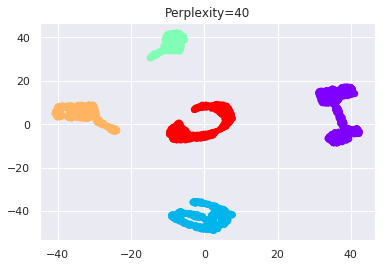

S-curve, perplexity=43 in 4.8 sec


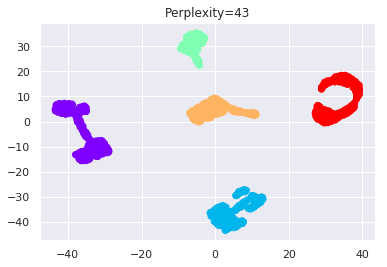

S-curve, perplexity=46 in 5.2 sec


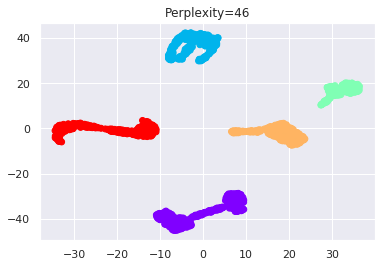

S-curve, perplexity=49 in 5.3 sec


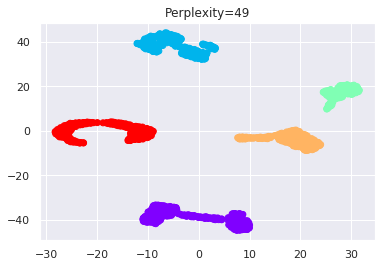

S-curve, perplexity=52 in 5.3 sec


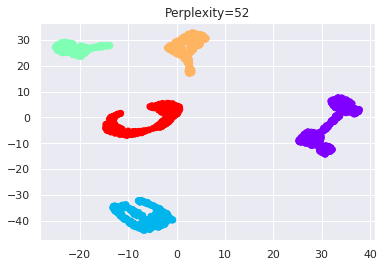

S-curve, perplexity=55 in 5.6 sec


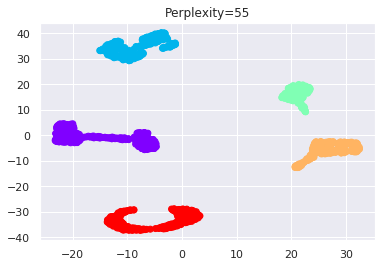

S-curve, perplexity=58 in 5.5 sec


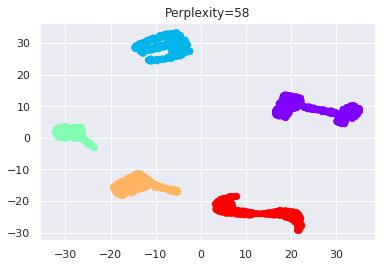

S-curve, perplexity=61 in 5.7 sec


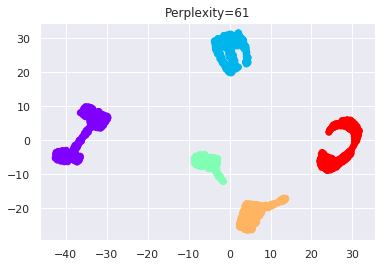

S-curve, perplexity=64 in 5.7 sec


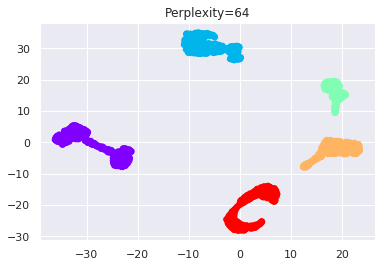

S-curve, perplexity=67 in 5.9 sec


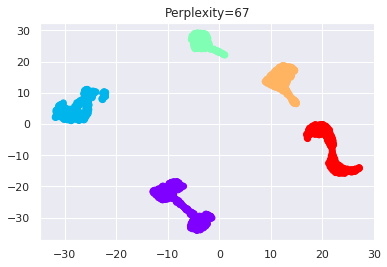

S-curve, perplexity=70 in 6.3 sec


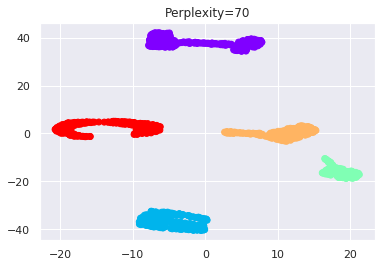

S-curve, perplexity=73 in 6.1 sec


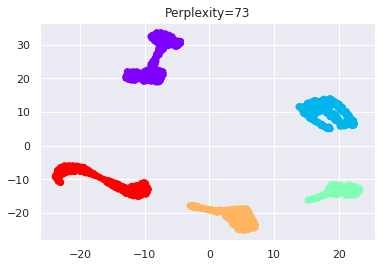

S-curve, perplexity=76 in 6.1 sec


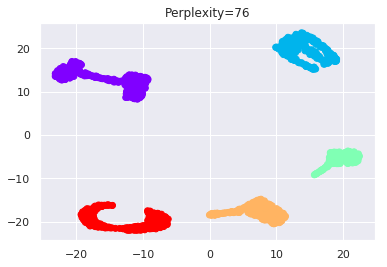

S-curve, perplexity=79 in 6.1 sec


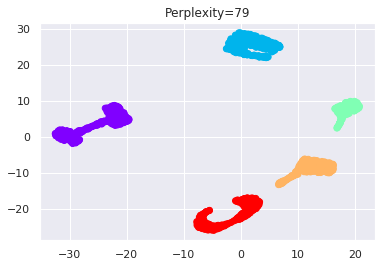

S-curve, perplexity=82 in 6.3 sec


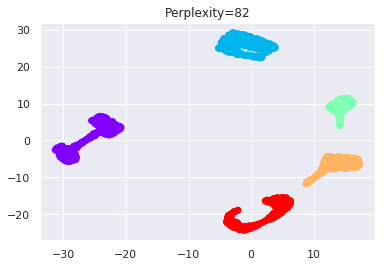

S-curve, perplexity=85 in 6.5 sec


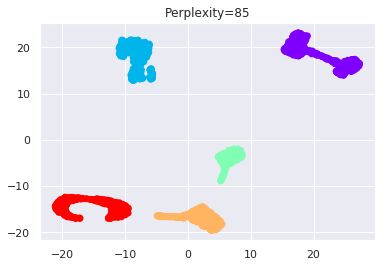

S-curve, perplexity=88 in 6.6 sec


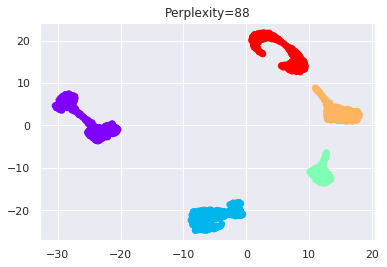

S-curve, perplexity=91 in 6.8 sec


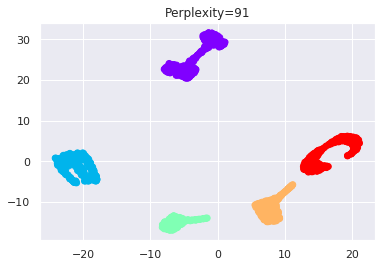

S-curve, perplexity=94 in 6.9 sec


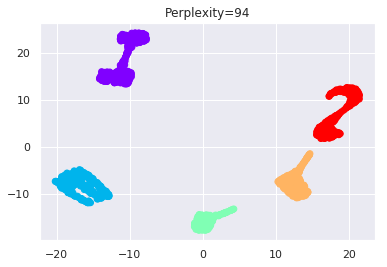

S-curve, perplexity=97 in 6.9 sec


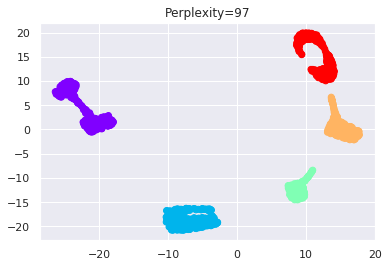

S-curve, perplexity=100 in 7 sec


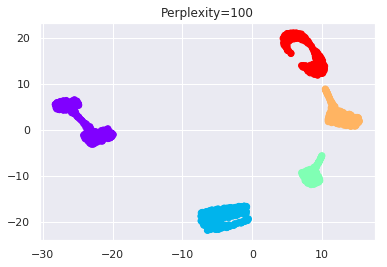

S-curve, perplexity=103 in 7.3 sec


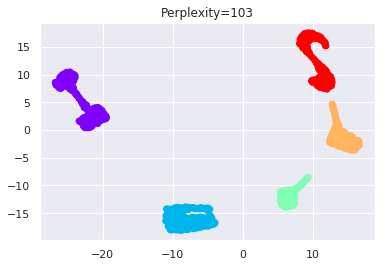

S-curve, perplexity=106 in 7.4 sec


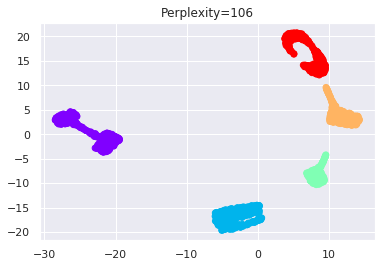

S-curve, perplexity=109 in 7.4 sec


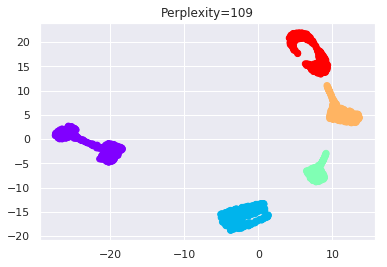

S-curve, perplexity=112 in 7.7 sec


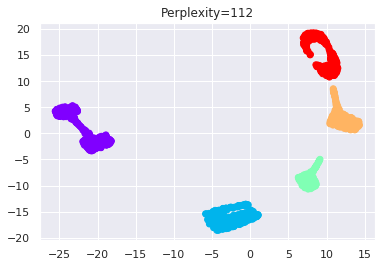

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
# 設定模型與繪圖參數

n_components =2

def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

X = make_hello(N=1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');
plt.show()


def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)   # x 像是 waveform 被調變，但是週期後全部被擠在一起, 要解開需要用 z ~~
    y = X[:, 1]    # y 不變
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

X = make_hello_s_curve(X)

from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],**colorize)
ax.view_init(azim=70, elev=50)
plt.show()

perplexities=range(1,199,3)



for i, perplexity in enumerate(perplexities):
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    plt.title("Perplexity=%d" % perplexity)
    plt.scatter(Y[:, 0], Y[:, 1], **colorize)
    plt.axis('tight')
    plt.show()


# 退一步, 再更進一步

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

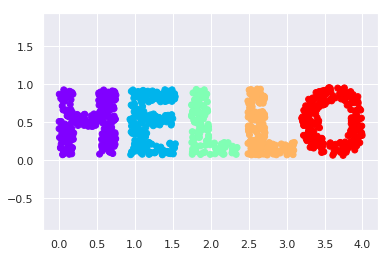

In [0]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

## Multidimensional Scaling (MDS)

Looking at data like this, we can see that the particular choice of *x* and *y* values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent.
For example, if we use a rotation matrix to rotate the data, the *x* and *y* values change, but the data is still fundamentally the same:

1.) 左轉個 20度

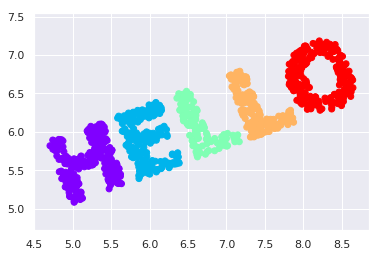

In [0]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

This tells us that the *x* and *y* values are not necessarily fundamental to the relationships in the data.
What *is* fundamental, in this case, is the *distance* between each point and the other points in the dataset.
A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$.
Let's use Scikit-Learn's efficient ``pairwise_distances`` function to do this for our original data:

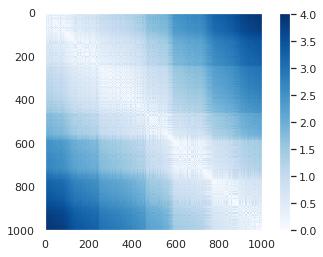

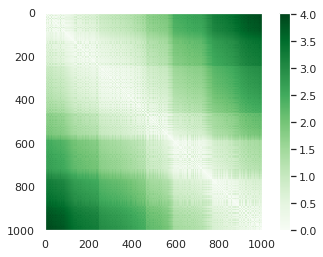

True


In [0]:
from sklearn.metrics import pairwise_distances
D1 = pairwise_distances(X)
D1.shape
plt.imshow(D1, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();
plt.show()


D2 = pairwise_distances(X2)
D2.shape
plt.imshow(D2, zorder=2, cmap='Greens', interpolation='nearest')
plt.colorbar();
plt.show()


print(np.allclose(D1, D2))



# numpy.allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)[source]¶
# Returns True if two arrays are element-wise equal within a tolerance.

This distance matrix gives us a representation of our data that is invariant to rotations and translations, but the visualization of the matrix above is not entirely intuitive.
In the representation shown in this figure, we have lost any visible sign of the interesting structure in the data: the "HELLO" that we saw before.

Further, while computing this distance matrix from the (x, y) coordinates is straightforward, transforming the distances back into *x* and *y* coordinates is rather difficult.
This is exactly what the multidimensional scaling algorithm aims to do: given a distance matrix between points, it recovers a $D$-dimensional coordinate representation of the data.
Let's see how it works for our distance matrix, using the ``precomputed`` dissimilarity to specify that we are passing a distance matrix:

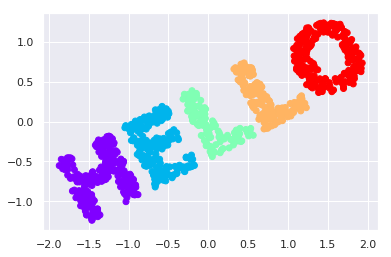

In [0]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

## MDS as Manifold Learning  (Linear Method)

The usefulness of this becomes more apparent when we consider the fact that distance matrices can be computed from data in *any* dimension.
So, for example, instead of simply rotating the data in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a three-dimensional generalization of the rotation matrix used earlier):

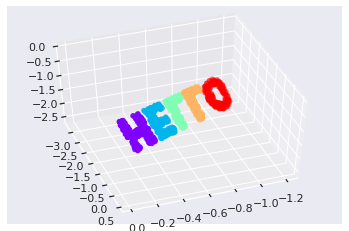

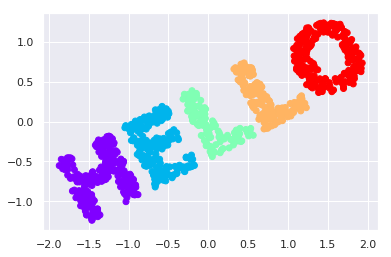

In [0]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]   
    # for example, X's dimensin is (1000,2), it tells us, X.shape[1]=2
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    # numpy.linalg.eigh(a, UPLO='L')[source]
    # Return the eigenvalues and eigenvectors of a Hermitian or symmetric matrix.
    return np.dot(X, V[:X.shape[1]]), C, e, V
    
X3, C, e, V = random_projection(X, 3, rseed=0)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)
plt.show()




# 以下才是真的 Manifold 從 三維 以相對距離資訊回到二維
# MDA

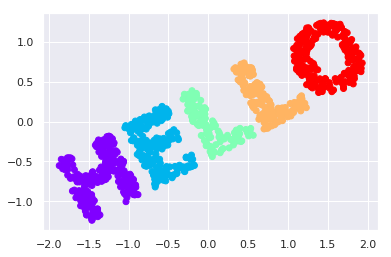

In [0]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');
plt.show()

  # 『作業』  

```
X3, C, e, V = random_projection(X, 3, rseed=42)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

plt.show()


model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');
plt.show()
```
不了解 展開空間沒關係 （非線性 n 個 n 維向量可以展開該維度空間）

但是觀察結果, 包含觀察不同, random  seed 所產生的  v


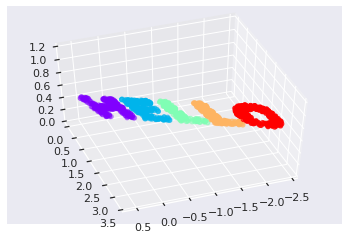

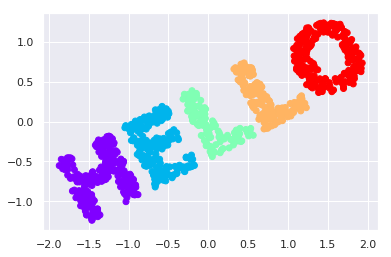

#  Non Linear Space

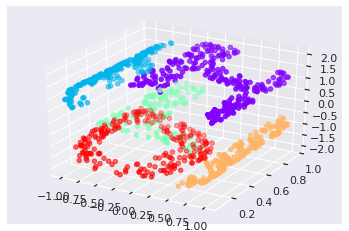

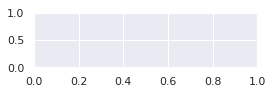

In [0]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)   # x 像是 waveform 被調變，但是週期後全部被擠在一起, 要解開需要用 z ~~
    y = X[:, 1]    # y 不變
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

fig, ax = plt.subplots(figsize=(4, 1))

# 『作業』去除去 z 會如何？


```
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    # z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y)).T

XS = make_hello_s_curve(X)

plt.scatter(XS[:,0], XS[:,1], **colorize)

```

觀看 X 軸的定義域


  # 使用 MDS

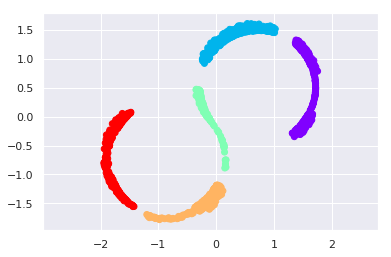

In [0]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

# MDS保留所點間的距離關係所以... always linear vs. LLE 只保留設定點數的距離


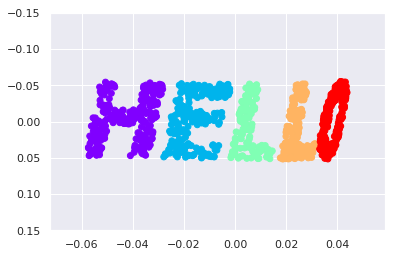

In [0]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')

# pls try diff. n_neighbors, and explain the results!
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# 『作業』pls try diff. n_neighbors, and explain the results!


```
n_neighbors=1,10,60,80,100


